# KDD Challenge

Este notebook foi criado para realizar a Análise Explanatória e Preprocessamento dos dados da KDD Cup 2009: Custumer relationship prediction, cedidos pela empresa de telecomunicação francesa Orange.


## Carregando os pacotes e lendo o banco de dados e labels

In [2]:
#lendo os pacotes
import os as os
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn import preprocessing

In [3]:
#Objeto com nome da pasta
path_data = 'C:/Users/Samsung/Documents/kdd_cup'

In [4]:
#Lendo os dados
df = pd.read_csv(f'{path_data}''/orange_small_train.data', sep = '\t')

In [99]:
#Lendo as Labels
churn = pd.read_csv(f'{path_data}''/orange_small_train_churn.labels', sep = '/n', header = None)
appentency = pd.read_csv(f'{path_data}''/orange_small_train_appetency.labels', sep = '/n', header = None)
upsell = pd.read_csv(f'{path_data}''/orange_small_train_upselling.labels', sep = '/n', header = None)

C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\Users\Samsung\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate f

## Explorando o banco de dados

In [16]:
#plotando o formato do dataframe
df.shape

(50000, 230)

Conforme apresentado o banco tem 50.000 casos de 230 features.

In [43]:
#plotando a quantidade de variaveis por tipo
df.dtypes.value_counts()

float64    191
object      38
int64        1
dtype: int64

In [44]:
#estatísticas descritivas sobre as variavéis númericas
df.describe()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var183,Var184,Var185,Var186,Var187,Var188,Var189,Var190,Var209,Var230
count,702.000000,1241.000000,1240.000000,1579.000000,1.487000e+03,44471.000000,44461.000000,0.0,702.000000,1.487000e+03,...,1.241000e+03,1241.000000,0.0,702.000000,702.00000,1241.000000,21022.000000,333.000000,0.0,0.0
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,NaN,48.145299,3.926057e+05,...,7.777380e+04,8.460919,NaN,3.299145,16.54416,167.368477,270.142137,22007.045192,NaN,NaN
std,40.709951,0.141933,4270.193518,1.275481,6.441259e+05,2685.693668,6.326053,NaN,154.777855,9.280896e+05,...,2.016188e+05,46.973777,NaN,8.781967,60.22303,113.980072,86.707692,29085.146490,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,NaN,0.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,-6.420000,6.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,518.000000,0.000000,NaN,4.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,0.00000,19.380000,204.000000,2732.670000,NaN,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000e+00,861.000000,7.000000,NaN,20.000000,0.000000e+00,...,0.000000e+00,0.000000,NaN,0.000000,4.00000,197.640000,270.000000,12668.940000,NaN,NaN
75%,16.000000,0.000000,0.000000,0.000000,1.187425e+05,1428.000000,7.000000,NaN,46.000000,2.628630e+05,...,4.881000e+04,8.000000,NaN,6.000000,14.00000,252.960000,330.000000,29396.340000,NaN,NaN
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,NaN,2300.000000,1.232559e+07,...,3.048400e+06,1200.000000,NaN,102.000000,910.00000,628.620000,642.000000,230427.000000,NaN,NaN


In [16]:
#Criando tabela com as variáveis que estão faltando valores e o respectivo percentual faltante.
df_null = (df.isnull().sum() / len(df))*100
missing = pd.DataFrame({'Percentual Missing' :df_null})
missing.head(5)

,Percentual Missing
Var1,98.596
Var2,97.518
Var3,97.520
Var4,96.842
Var5,97.026


In [55]:
#estatísticas descritivas sobre as variáveis com dados faltantes
missing.describe()

,Percentual Missing
count,230.000000
mean,69.775235
std,41.549023
min,0.000000
25%,11.078000
50%,97.026000
75%,98.596000
max,100.000000


Nota-se que, em média, 69% das observações estão faltando no banco de dados.

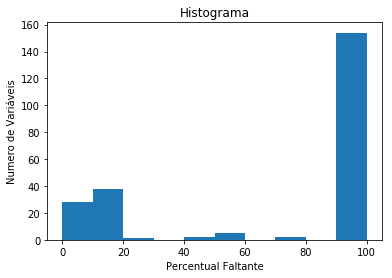

In [94]:
#Plotando o histograma com Percentual de valores faltantes
x = np.array(missing['Percentual Missing'])
plt.hist(x,bins =10)
plt.title("Histograma")
plt.xlabel("Percentual Faltante")
plt.ylabel("Numero de Variáveis")
plt.show()

Além da grande massa de dados faltantes, observamos uma concentração de dados com até 20% de observações faltando.

In [6]:
#explorando as variaveis categoricas
features_names = df.columns
features_type = df.dtypes
object_features_names = [features_names for features_names in features_names 
                           if features_type[features_names] == object]

object_features_names

['Var191',
 'Var192',
 'Var193',
 'Var194',
 'Var195',
 'Var196',
 'Var197',
 'Var198',
 'Var199',
 'Var200',
 'Var201',
 'Var202',
 'Var203',
 'Var204',
 'Var205',
 'Var206',
 'Var207',
 'Var208',
 'Var210',
 'Var211',
 'Var212',
 'Var213',
 'Var214',
 'Var215',
 'Var216',
 'Var217',
 'Var218',
 'Var219',
 'Var220',
 'Var221',
 'Var222',
 'Var223',
 'Var224',
 'Var225',
 'Var226',
 'Var227',
 'Var228',
 'Var229']

In [8]:
#Variaveis cateforicas
df_categorical = df[object_features_names]
df_categorical.apply(lambda x:x.value_counts())

,Var191,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,...,Var220,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229
000J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00ARusu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AYONy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00AhP4J,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00J8E9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00JHTSP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00L3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00Lk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explorando as Labels

### Churn

In [103]:
#Shape dos dados
churn.shape

(50000, 1)

In [105]:
#5 primeiros valores
churn.head(5)

,0
0,-1
1,1
2,-1
3,-1
4,-1


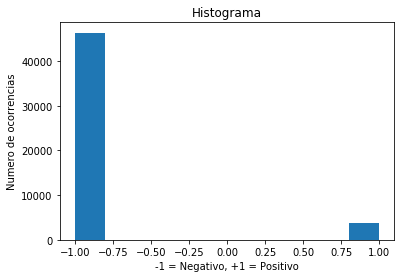

In [108]:
#Plotando a frequencia de Negativos e Positivos
x = np.array(churn)
plt.hist(x,bins =10)
plt.title("Histograma")
plt.xlabel("-1 = Negativo, +1 = Positivo")
plt.ylabel("Numero de ocorrencias")
plt.show()

### Appentency

In [114]:
#Shape dos dados
appentency.shape

(50000, 1)

In [116]:
#5 Primeiros valores
appentency.head(5)

,0
0,-1
1,-1
2,-1
3,-1
4,-1


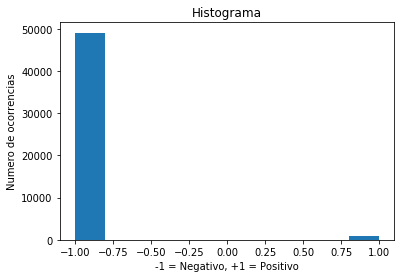

In [118]:
#Frequencia de Positivos  e Negativos
x = np.array(appentency)
plt.hist(x,bins =10)
plt.title("Histograma")
plt.xlabel("-1 = Negativo, +1 = Positivo")
plt.ylabel("Numero de ocorrencias")
plt.show()

### Upselling

In [120]:
#Shape dos dados
upsell.shape

(50000, 1)

In [122]:
#5 primeiros casos
upsell.head(5)

,0
0,-1
1,-1
2,-1
3,-1
4,-1


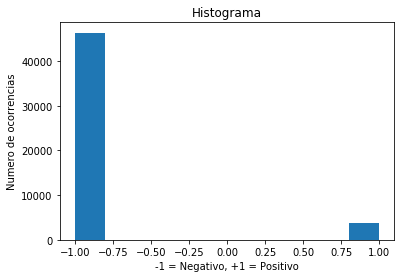

In [124]:
#Plotando Negativos e Positivos
x = np.array(upsell)
plt.hist(x,bins =10)
plt.title("Histograma")
plt.xlabel("-1 = Negativo, +1 = Positivo")
plt.ylabel("Numero de ocorrencias")
plt.show()

As labels estão extramamente desbalanceadas, o que pode influenciar na predição.

Na criação do modelo poderemos utilizar de ferramentas como o upsampling para fornecer mais observações dos casos contendo a variável que se deseja predizer.

## Preprocessamento dos dados

Iremos:

     1- Dropar variaveis com mais de 20% de dados faltantes.
     
     2- Excluir as variaveis categoricas.
     
     3- Transformar a variavel do tipo Integer para Float. 
     
     4 - Preencher as observações faltantes com as médias dos valores.

In [129]:
#Retirando as variaveis com menos de 20% de dados faltantes.
new_variables = missing[missing['Percentual Missing'] <= 20].index
new_variables

Index(['Var6', 'Var7', 'Var13', 'Var21', 'Var22', 'Var24', 'Var25', 'Var28',
       'Var35', 'Var38', 'Var44', 'Var57', 'Var65', 'Var73', 'Var74', 'Var76',
       'Var78', 'Var81', 'Var83', 'Var85', 'Var109', 'Var112', 'Var113',
       'Var119', 'Var123', 'Var125', 'Var132', 'Var133', 'Var134', 'Var140',
       'Var143', 'Var144', 'Var149', 'Var153', 'Var160', 'Var163', 'Var173',
       'Var181', 'Var192', 'Var193', 'Var195', 'Var196', 'Var197', 'Var198',
       'Var199', 'Var202', 'Var203', 'Var204', 'Var205', 'Var206', 'Var207',
       'Var208', 'Var210', 'Var211', 'Var212', 'Var216', 'Var217', 'Var218',
       'Var219', 'Var220', 'Var221', 'Var222', 'Var223', 'Var226', 'Var227',
       'Var228'],
      dtype='object')

In [158]:
#Criando o novo dataset
df_process = df[new_variables]

df_process.head(5)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var226,Var227,Var228
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,xb3V,RAYp,F2FyR07IdsN7I
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,NaN,NaN,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,fKCe,RAYp,F2FyR07IdsN7I
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,Qu4f,02N6s8f,ib5G6X1eUxUn6
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,FSa2,RAYp,F2FyR07IdsN7I


In [149]:
# retirando as variaveis categoricas do dataframe
features_names = df_process.columns
features_type = df_process.dtypes
features_names = [features_names for features_names in features_names 
                           if features_type[features_names] != object]

features_names 

['Var6',
 'Var7',
 'Var13',
 'Var21',
 'Var22',
 'Var24',
 'Var25',
 'Var28',
 'Var35',
 'Var38',
 'Var44',
 'Var57',
 'Var65',
 'Var73',
 'Var74',
 'Var76',
 'Var78',
 'Var81',
 'Var83',
 'Var85',
 'Var109',
 'Var112',
 'Var113',
 'Var119',
 'Var123',
 'Var125',
 'Var132',
 'Var133',
 'Var134',
 'Var140',
 'Var143',
 'Var144',
 'Var149',
 'Var153',
 'Var160',
 'Var163',
 'Var173',
 'Var181']

In [152]:
#Quantidade de variaveis categoricas
len(features_names)

38

In [159]:
#Criando o novo banco de dados
df_process = df_process[features_names]

In [160]:
#Printando os 5 primeiros casos
df_process.head(5)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,...,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0
1,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,...,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0
2,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,...,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0
3,NaN,0.0,0.0,NaN,0.0,NaN,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,...,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0


In [164]:
# Trocando todas variaveis para o tipo float
df_process = df_process.astype(float)

In [167]:
#Conferindo
df_process.dtypes.value_counts()

float64    38
dtype: int64

In [168]:
#preenchendo os valores com a média

df_process = df_process.fillna(df_process.mean())

df_process.describe()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,...,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000
mean,1326.437116,6.809496,1249.688401,234.518225,290.245382,4.507926,96.827010,224.507669,0.716810,2.579107e+06,...,4.373404e+05,1381.259643,0.058012,11.727665,2.949208e+05,6.181967e+06,38.803005,4.860780e+05,0.006846,0.611456
std,2532.849475,5.965363,2635.596185,533.373831,668.270306,9.182934,203.299616,93.452978,2.841975,2.855321e+06,...,5.732707e+05,3762.985373,0.609999,11.053281,6.075466e+05,4.125336e+06,94.381739,8.052215e+05,0.125691,2.367372
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,581.000000,0.000000,4.000000,120.000000,150.000000,0.000000,16.000000,166.560000,0.000000,1.762500e+04,...,4.149000e+04,0.000000,0.000000,0.000000,0.000000e+00,1.608488e+06,10.000000,0.000000e+00,0.000000,0.000000
50%,945.000000,7.000000,376.000000,156.000000,190.000000,2.000000,56.000000,220.080000,0.000000,2.073606e+06,...,2.836070e+05,360.000000,0.000000,9.000000,1.234835e+05,6.181967e+06,26.000000,2.100360e+05,0.000000,0.000000
75%,1326.437116,7.000000,1264.000000,234.518225,290.245382,4.507926,104.000000,256.960000,0.000000,4.241100e+06,...,5.491260e+05,1381.259643,0.000000,18.000000,3.067312e+05,1.033293e+07,38.803005,5.254020e+05,0.000000,0.000000
max,131761.000000,140.000000,197872.000000,36272.000000,45340.000000,494.000000,13168.000000,5158.560000,110.000000,1.884690e+07,...,5.735340e+06,520545.000000,18.000000,81.000000,1.693440e+07,1.390780e+07,4862.000000,1.451520e+07,6.000000,49.000000


In [ ]:
#Plotar correlacao entre variaveis

def plot_correlac(df):
    corr = df.corr(method='spearman')
    fig = plt.figure(11)
    ax = fig.add_subplot(111)
    cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,len(df.columns),1)
    ax.set_xticks(ticks)
    plt.xticks(rotation=90)
    ax.set_yticks(ticks)
    ax.set_xticklabels(df.columns)
    ax.set_yticklabels(df.columns)
    plt.show()

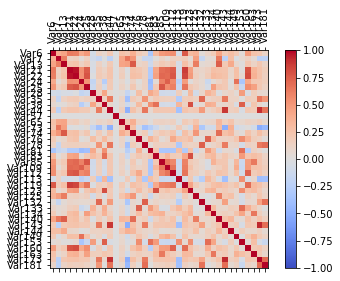

In [195]:
#Plotando a correlação
plot_correlac(df_process)

In [182]:
#Criando o csv com os dados limpos
df_process.to_csv('df_process.csv', index = False)

In [17]:
test = pd.read_csv('df_process.csv')

test.head(5)

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,...,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181
0,1526.000000,7.0,184.0,464.000000,580.0,14.000000,128.0,166.56,0.0,3570.0,...,69134.0,185.0,0.0,9.000000,397579.000000,1812252.0,142.0,38418.0,0.0,0.0
1,525.000000,0.0,0.0,168.000000,210.0,2.000000,24.0,353.52,0.0,4764966.0,...,357038.0,0.0,0.0,9.000000,278334.000000,10439160.0,32.0,238572.0,0.0,0.0
2,5236.000000,7.0,904.0,1212.000000,1515.0,26.000000,816.0,220.08,0.0,5883894.0,...,248932.0,800.0,0.0,36.000000,320565.000000,9826360.0,206.0,434946.0,0.0,0.0
3,1326.437116,0.0,0.0,234.518225,0.0,4.507926,0.0,22.08,0.0,0.0,...,0.0,0.0,0.0,11.727665,294920.804255,0.0,0.0,0.0,0.0,0.0
4,1029.000000,7.0,3216.0,64.000000,80.0,4.000000,64.0,200.00,0.0,0.0,...,66046.0,3255.0,0.0,9.000000,267162.000000,644836.0,2.0,0.0,0.0,0.0
